In [ ]:
!pip install pyvis

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 10.6 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Load Graphs + Calculate Metrics

import networkx as nx
import pandas as pd
import json
import os
import re
from tqdm import tqdm

# Specify the directory path
directory = "/content/drive/MyDrive/"


models = ["new-llama3-70b-chat", "new_PalmyraMed", "new_gpt-4"]
paths = []

dfs = {key: None for key in models}

# iterate through all graphs in directory. Load graphs into networkx from json. Calculate metrics for each graph. Add to dataframe.
for model in models:
  paths = []
  # Get list of graph file paths
  for filename in os.listdir(directory + f"gen/{model}/"):
      if os.path.isfile(os.path.join(directory + f"gen/{model}/", filename)):
          if filename.endswith(".json"):
              paths.append(filename[:-5])

  print(paths)
  paths = sorted(list(set(paths)), key=str.lower)
  data = []
  j = 0
  for i in tqdm(paths):
      with open(directory + f"gen/{model}/" + i + ".json", "r") as p:
          print(f"\n{model}, {i}")
          G = nx.node_link_graph(json.load(p))

          simple_cycles = len(list(nx.simple_cycles(G)))

          # calculate metrics...
          average_clustering = nx.average_clustering(G)
          average_node_connectivity = nx.average_node_connectivity(G)
          degree_assortativity_coefficient = nx.degree_assortativity_coefficient(G)
          is_planar = nx.is_planar(G)
          reciprocity = nx.reciprocity(G)

          degree_centrality = dict(sorted(nx.degree_centrality(G).items(), key=lambda item: item[1], reverse=True))
          # eigenvector_centrality = dict(sorted(nx.eigenvector_centrality(G).items(), key=lambda item: item[1], reverse=True))

          in_degree_centrality = dict(sorted(nx.in_degree_centrality(G).items(), key=lambda item: item[1], reverse=True))
          out_degree_centrality = dict(sorted(nx.out_degree_centrality(G).items(), key=lambda item: item[1], reverse=True))


          is_eulerian = nx.is_eulerian(G)
          euler_characteristic = len(G.nodes()) - len(G.edges())

          data.append(
              [
                  len(G.nodes()),
                  len(G.edges()),
                  nx.density(G),
                  average_clustering,
                  average_node_connectivity,
                  degree_assortativity_coefficient,
                  reciprocity,
                  euler_characteristic,
                  degree_centrality,

                  # eigenvector_centrality,
                  in_degree_centrality,
                  out_degree_centrality,
                  simple_cycles
              ]
          )
      j += 1

  dfs[f"{model}"] = pd.DataFrame(data, index=paths, columns = [
                  "nodes",
                  "edges",
                  "density",
                  "average_clustering",
                  "average_node_connectivity",
                  "degree_assortativity_coefficient",
                  "reciprocity",
                  "euler_characteristic",
                  "degree_centrality",
                  #"eigenvector_centrality",
                  "in_degree_centrality",
                  "out_degree_centrality",
                  "simple_cycles"]
                  )

['arthritis', 'human immunodeficiency virus', 'creutzfeldt-jakob disease', 'spontaneous coronary artery dissection', 'parkinson’s disease', 'diabetes mellitus', 'severe acute respiratory syndrome coronavirus 2', 'malignant neoplasms of liver', 'asthma', 'myocardial infarction', 'ulcerative colitis', 'renal artery stenosis', 'ischemic stroke', 'glioblastoma', 'dementia', 'lung cancer', 'myocarditis', 'hyperparathyroidism', 'esophageal achalasia', 'acute flaccid myelitis']


  0%|          | 0/20 [00:00<?, ?it/s]


new-llama3-70b-chat, acute flaccid myelitis


  5%|▌         | 1/20 [00:00<00:15,  1.26it/s]


new-llama3-70b-chat, arthritis


 10%|█         | 2/20 [00:01<00:14,  1.20it/s]


new-llama3-70b-chat, asthma


 15%|█▌        | 3/20 [00:02<00:11,  1.44it/s]


new-llama3-70b-chat, creutzfeldt-jakob disease


 20%|██        | 4/20 [00:02<00:09,  1.64it/s]


new-llama3-70b-chat, dementia


 25%|██▌       | 5/20 [00:03<00:09,  1.59it/s]


new-llama3-70b-chat, diabetes mellitus


 30%|███       | 6/20 [00:03<00:08,  1.73it/s]


new-llama3-70b-chat, esophageal achalasia


 35%|███▌      | 7/20 [00:04<00:07,  1.68it/s]


new-llama3-70b-chat, glioblastoma


 40%|████      | 8/20 [00:05<00:07,  1.63it/s]


new-llama3-70b-chat, human immunodeficiency virus


 45%|████▌     | 9/20 [00:05<00:06,  1.79it/s]


new-llama3-70b-chat, hyperparathyroidism


 50%|█████     | 10/20 [00:06<00:05,  1.78it/s]


new-llama3-70b-chat, ischemic stroke


 55%|█████▌    | 11/20 [00:06<00:05,  1.79it/s]


new-llama3-70b-chat, lung cancer


 60%|██████    | 12/20 [00:07<00:04,  1.79it/s]


new-llama3-70b-chat, malignant neoplasms of liver


 65%|██████▌   | 13/20 [00:07<00:03,  1.80it/s]


new-llama3-70b-chat, myocardial infarction


 70%|███████   | 14/20 [00:08<00:03,  1.93it/s]


new-llama3-70b-chat, myocarditis


 75%|███████▌  | 15/20 [00:08<00:02,  1.88it/s]


new-llama3-70b-chat, parkinson’s disease


 80%|████████  | 16/20 [00:09<00:02,  1.70it/s]


new-llama3-70b-chat, renal artery stenosis


 85%|████████▌ | 17/20 [00:10<00:01,  1.56it/s]


new-llama3-70b-chat, severe acute respiratory syndrome coronavirus 2


 90%|█████████ | 18/20 [00:10<00:01,  1.67it/s]


new-llama3-70b-chat, spontaneous coronary artery dissection


 95%|█████████▌| 19/20 [00:11<00:00,  1.72it/s]


new-llama3-70b-chat, ulcerative colitis


100%|██████████| 20/20 [00:11<00:00,  1.71it/s]


['glioblastoma', 'dementia', 'ulcerative colitis', 'acute flaccid myelitis', 'renal artery stenosis', 'arthritis', 'diabetes mellitus', 'myocardial infarction', 'ischemic stroke', 'parkinson’s disease', 'severe acute respiratory syndrome coronavirus 2', 'spontaneous coronary artery dissection', 'hyperparathyroidism', 'myocarditis', 'malignant neoplasms of liver', 'asthma', 'esophageal achalasia', 'lung cancer', 'human immunodeficiency virus', 'creutzfeldt-jakob disease']


  0%|          | 0/20 [00:00<?, ?it/s]


new_PalmyraMed, acute flaccid myelitis


  5%|▌         | 1/20 [00:00<00:14,  1.34it/s]


new_PalmyraMed, arthritis


 10%|█         | 2/20 [00:01<00:13,  1.33it/s]


new_PalmyraMed, asthma


 15%|█▌        | 3/20 [00:02<00:12,  1.40it/s]


new_PalmyraMed, creutzfeldt-jakob disease


 20%|██        | 4/20 [00:02<00:11,  1.43it/s]


new_PalmyraMed, dementia


 25%|██▌       | 5/20 [00:03<00:09,  1.61it/s]


new_PalmyraMed, diabetes mellitus


 30%|███       | 6/20 [00:04<00:09,  1.54it/s]


new_PalmyraMed, esophageal achalasia


 35%|███▌      | 7/20 [00:04<00:07,  1.63it/s]


new_PalmyraMed, glioblastoma


 40%|████      | 8/20 [00:05<00:07,  1.70it/s]


new_PalmyraMed, human immunodeficiency virus


 45%|████▌     | 9/20 [00:05<00:06,  1.79it/s]


new_PalmyraMed, hyperparathyroidism


 50%|█████     | 10/20 [00:06<00:05,  1.78it/s]


new_PalmyraMed, ischemic stroke


 55%|█████▌    | 11/20 [00:06<00:04,  1.83it/s]


new_PalmyraMed, lung cancer


 60%|██████    | 12/20 [00:07<00:04,  1.87it/s]


new_PalmyraMed, malignant neoplasms of liver


 65%|██████▌   | 13/20 [00:16<00:21,  3.14s/it]


new_PalmyraMed, myocardial infarction


 70%|███████   | 14/20 [00:16<00:13,  2.32s/it]


new_PalmyraMed, myocarditis


 75%|███████▌  | 15/20 [00:17<00:08,  1.76s/it]


new_PalmyraMed, parkinson’s disease


 80%|████████  | 16/20 [00:17<00:05,  1.36s/it]


new_PalmyraMed, renal artery stenosis


 85%|████████▌ | 17/20 [00:18<00:03,  1.08s/it]


new_PalmyraMed, severe acute respiratory syndrome coronavirus 2


 90%|█████████ | 18/20 [00:18<00:01,  1.14it/s]


new_PalmyraMed, spontaneous coronary artery dissection


 95%|█████████▌| 19/20 [00:18<00:00,  1.35it/s]


new_PalmyraMed, ulcerative colitis


100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


['myocarditis', 'myocardial infarction', 'severe acute respiratory syndrome coronavirus 2', 'lung cancer', 'asthma', 'dementia', 'spontaneous coronary artery dissection', 'ischemic stroke', 'human immunodeficiency virus', 'parkinson’s disease', 'renal artery stenosis', 'malignant neoplasms of liver', 'glioblastoma', 'diabetes mellitus', 'ulcerative colitis', 'arthritis', 'creutzfeldt-jakob disease', 'hyperparathyroidism', 'esophageal achalasia', 'acute flaccid myelitis']


  0%|          | 0/20 [00:00<?, ?it/s]


new_gpt-4, acute flaccid myelitis


  5%|▌         | 1/20 [00:00<00:10,  1.78it/s]


new_gpt-4, arthritis


 10%|█         | 2/20 [00:01<00:09,  1.91it/s]


new_gpt-4, asthma


 15%|█▌        | 3/20 [00:01<00:09,  1.80it/s]


new_gpt-4, creutzfeldt-jakob disease


 20%|██        | 4/20 [00:02<00:09,  1.67it/s]


new_gpt-4, dementia


 25%|██▌       | 5/20 [00:02<00:08,  1.73it/s]


new_gpt-4, diabetes mellitus


 30%|███       | 6/20 [00:03<00:08,  1.67it/s]


new_gpt-4, esophageal achalasia


 35%|███▌      | 7/20 [00:04<00:08,  1.56it/s]


new_gpt-4, glioblastoma


 40%|████      | 8/20 [00:05<00:08,  1.46it/s]


new_gpt-4, human immunodeficiency virus


 45%|████▌     | 9/20 [00:05<00:07,  1.54it/s]


new_gpt-4, hyperparathyroidism


 50%|█████     | 10/20 [00:06<00:05,  1.70it/s]


new_gpt-4, ischemic stroke


 55%|█████▌    | 11/20 [00:06<00:05,  1.65it/s]


new_gpt-4, lung cancer


 60%|██████    | 12/20 [00:07<00:05,  1.44it/s]


new_gpt-4, malignant neoplasms of liver


 65%|██████▌   | 13/20 [00:08<00:04,  1.51it/s]


new_gpt-4, myocardial infarction


 70%|███████   | 14/20 [00:08<00:04,  1.48it/s]


new_gpt-4, myocarditis


 75%|███████▌  | 15/20 [00:09<00:03,  1.37it/s]


new_gpt-4, parkinson’s disease


 80%|████████  | 16/20 [00:10<00:02,  1.43it/s]


new_gpt-4, renal artery stenosis


 85%|████████▌ | 17/20 [00:10<00:01,  1.62it/s]


new_gpt-4, severe acute respiratory syndrome coronavirus 2


 90%|█████████ | 18/20 [00:11<00:01,  1.77it/s]


new_gpt-4, spontaneous coronary artery dissection


 95%|█████████▌| 19/20 [00:11<00:00,  1.83it/s]


new_gpt-4, ulcerative colitis


100%|██████████| 20/20 [00:12<00:00,  1.62it/s]


In [ ]:
#@title Save Graphs to HTML

from pyvis.network import Network
import networkx as nx
import json
import os

models = ["new-llama3-70b-chat", "new_PalmyraMed", "new_gpt-4"]

for model in models:
  path = f'/content/drive/MyDrive/gen/{model}/'

  directory = f"/content/drive/MyDrive/htmls/{model}/"

  # Create directory if it does not exist
  if not os.path.exists(directory):
      os.makedirs(directory)

  for f in os.listdir(path):
    if os.path.isfile(os.path.join(path, f)) and f.endswith('.json'):
      with open(path + f, 'r') as data:
        print(f"Graph for root node: {f}")
        data = json.load(data)
        graph = nx.node_link_graph(data)

        vis = Network(notebook=True, cdn_resources='remote', directed='true', select_menu=True)
        vis.barnes_hut(gravity=-1000, central_gravity=.25)
        vis.from_nx(graph)

        for node in vis.nodes:
          node["font"]={"size": 30}
          node["title"] = node["id"] + "\n" "Causes:\n" + str(list(((vis.neighbors(node["id"]))))) + "\nCaused by:\n" + "[" + "\n".join([', '.join([i for i in vis.get_nodes() if node["id"] in vis.neighbors(i)][j:j+5]) for j in range(0, len([i for i in vis.get_nodes() if node["id"] in vis.neighbors(i)]), 5)]) + "]"

        vis.save_graph(f"{directory}{model}_{f[:-5]}.html")

Graph for root node: arthritis.json
Graph for root node: human immunodeficiency virus.json
Graph for root node: creutzfeldt-jakob disease.json
Graph for root node: spontaneous coronary artery dissection.json
Graph for root node: parkinson’s disease.json
Graph for root node: diabetes mellitus.json
Graph for root node: severe acute respiratory syndrome coronavirus 2.json
Graph for root node: malignant neoplasms of liver.json
Graph for root node: asthma.json
Graph for root node: myocardial infarction.json
Graph for root node: ulcerative colitis.json
Graph for root node: renal artery stenosis.json
Graph for root node: ischemic stroke.json
Graph for root node: glioblastoma.json
Graph for root node: dementia.json
Graph for root node: lung cancer.json
Graph for root node: myocarditis.json
Graph for root node: hyperparathyroidism.json
Graph for root node: esophageal achalasia.json
Graph for root node: acute flaccid myelitis.json
Graph for root node: glioblastoma.json
Graph for root node: demen

# Full Dataframes

In [ ]:
bios_values = {'new-llama3-70b-chat_precision': [0.1794871794871795, 0.14492753623188406, 0.23809523809523808, 0.11235955056179775, 0.11827956989247312, 0.19148936170212766, 0.14166666666666666, 0.23863636363636365, 0.20212765957446807, 0.4864864864864865, 0.359375, 0.24193548387096775, 0.375, 0.1553398058252427, 0.37142857142857144, 0.0, 0.18055555555555555, 0.08888888888888889, 0.0, 0.21052631578947367], 'new-llama3-70b-chat_recall': [0.007345225603357817, 0.01256281407035176, 0.009881422924901186, 0.012853470437017995, 0.011224489795918367, 0.028938906752411574, 0.023319615912208505, 0.01895306859205776, 0.0037416305632138637, 0.017200191113234592, 0.010511882998171846, 0.008108108108108109, 0.013470173187940988, 0.03389830508474576, 0.01126028583802512, 0.0, 0.010933557611438183, 0.003676470588235294, 0.0, 0.008620689655172414], 'new_PalmyraMed_precision': [0.4489795918367347, 0.13793103448275862, 0.5272727272727272, 0.14545454545454545, 0.18666666666666668, 0.22784810126582278, 0.0872093023255814, 0.21428571428571427, 0.09523809523809523, 0.3076923076923077, 0.5076923076923077, 0.4375, 0.3148148148148148, 0.13095238095238096, 0.37735849056603776, 0.02666666666666667, 0.25, 0.07692307692307693, 0.1320754716981132, 0.24615384615384617], 'new_PalmyraMed_recall': [0.012746234067207415, 0.016260162601626018, 0.019104084321475624, 0.007380073800738007, 0.010057471264367816, 0.04639175257731959, 0.0205761316872428, 0.014506769825918761, 0.01277139208173691, 0.015337423312883436, 0.016034985422740525, 0.01704199634814364, 0.008329250367466928, 0.39285714285714285, 0.012217470983506415, 0.008928571428571428, 0.010759919300605245, 0.00375234521575985, 0.01263537906137184, 0.012578616352201259], 'new_gpt-4_precision': [0.358974358974359, 0.14893617021276595, 0.13186813186813187, 0.1375, 0.15492957746478872, 0.018018018018018018, 0.03389830508474576, 0.22448979591836735, 0.35294117647058826, 0.12727272727272726, 0.3116883116883117, 0.14705882352941177, 0.052083333333333336, 0.07534246575342465, 0.30851063829787234, 0.03636363636363636, 0.20512820512820512, 0.08235294117647059, 0.12962962962962962, 0.2376237623762376], 'new_gpt-4_recall': [0.011705685618729096, 0.017857142857142856, 0.0052173913043478265, 0.016717325227963525, 0.014397905759162303, 0.006024096385542169, 0.0035460992907801418, 0.016176470588235296, 0.010727056019070322, 0.00674373795761079, 0.01486988847583643, 0.006002400960384154, 0.008912655971479501, 0.021568627450980392, 0.01197852127220157, 0.002770083102493075, 0.01048951048951049, 0.0068762278978389, 0.009408602150537635, 0.03116883116883117]}

for model in models:
  dfs[f"{model}"]["precision"] = bios_values[f"{model}_precision"]
  dfs[f"{model}"]["recall"] = bios_values[f"{model}_recall"]

In [ ]:
import pandas as pd


PalmyraMed_avg_acc = [
    "2.666666667",
    "2.666666667",
    "2.333333333",
    "2.666666667",
    "3.333333333",
    "3.666666667",
    "2.666666667",
    "3",
    "3.333333333",
    "3",
    "4",
    "3.666666667",
    "3.666666667",
    "4",
    "3.333333333",
    "3.333333333",
    "3.666666667",
    "3",
    "2",
    "2.666666667"
]

PalmyraMed_avg_comp = [
    "3.333333333",
    "3",
    "3",
    "3.333333333",
    "2.333333333",
    "3",
    "3",
    "3",
    "3",
    "3",
    "3",
    "2.666666667",
    "3",
    "3",
    "2.666666667",
    "2.333333333",
    "3.666666667",
    "3.666666667",
    "2.666666667",
    "2.666666667"
]

Llama3_avg_acc = [
    "3.666666667",
    "3",
    "3.333333333",
    "2.666666667",
    "3.333333333",
    "4",
    "3",
    "2.666666667",
    "3.333333333",
    "3.333333333",
    "3.666666667",
    "3.666666667",
    "3.666666667",
    "3.333333333",
    "3.666666667",
    "3",
    "3.333333333",
    "3",
    "3",
    "3"
]

Llama3_avg_comp = [
    "3",
    "3.333333333",
    "3",
    "2.666666667",
    "3.333333333",
    "3.666666667",
    "3",
    "2",
    "2.333333333",
    "2.666666667",
    "4",
    "2.333333333",
    "3",
    "2.666666667",
    "3",
    "3",
    "3.666666667",
    "3.333333333",
    "3",
    "3"
]

gpt_avg_acc = [
    "3.333333333",
    "3.333333333",
    "3.333333333",
    "3.333333333",
    "4",
    "3",
    "3.666666667",
    "2.666666667",
    "3.333333333",
    "4",
    "3.666666667",
    "3",
    "4",
    "3.333333333",
    "3",
    "3",
    "4",
    "3.333333333",
    "3",
    "3"
]

gpt_avg_comp = [
    "3.666666667",
    "3.333333333",
    "4",
    "3",
    "3.666666667",
    "2.833333333",
    "3",
    "3.333333333",
    "2.333333333",
    "3",
    "2.666666667",
    "4",
    "2.666666667",
    "3",
    "3",
    "3",
    "3.333333333",
    "3.666666667",
    "3.666666667",
    "3.333333333"
]

avg_disease_acc = [
    3.222222222,
    3,
    3,
    2.888888889,
    3.555555556,
    3.555555556,
    3.111111111,
    2.777777778,
    3.333333333,
    3.444444444,
    3.777777778,
    3.444444444,
    3.777777778,
    3.555555556,
    3.333333333,
    3.111111111,
    3.666666667,
    3.111111111,
    2.666666667,
    2.888888889
]

avg_disease_comp = [
    3.333333333,
    3.222222222,
    3.333333333,
    3,
    3.111111111,
    3.166666667,
    3,
    2.777777778,
    2.555555556,
    2.888888889,
    3.222222222,
    3,
    2.888888889,
    2.888888889,
    2.888888889,
    2.777777778,
    3.555555556,
    3.555555556,
    3.111111111,
    3
]

datas = []

for i in range(20):
  datas.append((avg_disease_acc[i], avg_disease_comp[i]))

dfs["averages"] = pd.DataFrame(datas, index=paths, columns = ["acc", "comp"]
                  )
dfs["new-llama3-70b-chat"]["acc"] = Llama3_avg_acc
dfs["new-llama3-70b-chat"]["comp"] = Llama3_avg_comp
dfs["new_PalmyraMed"]["acc"] = PalmyraMed_avg_acc
dfs["new_PalmyraMed"]["comp"] = PalmyraMed_avg_comp
dfs["new_gpt-4"]["acc"] = gpt_avg_acc
dfs["new_gpt-4"]["comp"] = gpt_avg_comp

In [ ]:
dfs["averages"].sort_values(by='acc', ascending=False)

,acc,comp
ischemic stroke,3.777778,3.222222
malignant neoplasms of liver,3.777778,2.888889
renal artery stenosis,3.666667,3.555556
dementia,3.555556,3.111111
diabetes mellitus,3.555556,3.166667
myocardial infarction,3.555556,2.888889
lung cancer,3.444444,3.000000
hyperparathyroidism,3.444444,2.888889
myocarditis,3.333333,2.888889
human immunodeficiency virus,3.333333,2.555556


In [ ]:
dfs["averages"].sort_values(by='comp', ascending=False)

,acc,comp
severe acute respiratory syndrome coronavirus 2,3.111111,3.555556
renal artery stenosis,3.666667,3.555556
acute flaccid myelitis,3.222222,3.333333
asthma,3.000000,3.333333
arthritis,3.000000,3.222222
ischemic stroke,3.777778,3.222222
diabetes mellitus,3.555556,3.166667
dementia,3.555556,3.111111
spontaneous coronary artery dissection,2.666667,3.111111
esophageal achalasia,3.111111,3.000000


In [ ]:
dfs["new-llama3-70b-chat"].sort_values(by='density', ascending=False)

,nodes,edges,density,average_clustering,average_node_connectivity,degree_assortativity_coefficient,reciprocity,euler_characteristic,degree_centrality,in_degree_centrality,out_degree_centrality,simple_cycles,precision,recall,acc,comp
asthma,27,88,0.125356,0.233132,0.864672,0.361969,0.090909,-61,"{'airway inflammation': 0.6153846153846154, 'l...","{'shortness of breath': 0.3076923076923077, 'w...",{'lower respiratory tract infection': 0.384615...,27,0.238095,0.009881,3.333333333,3
malignant neoplasms of liver,32,120,0.120968,0.261990,0.868952,0.200690,0.183333,-88,{'malignant neoplasms of liver': 0.58064516129...,{'malignant neoplasms of liver': 0.35483870967...,"{'hepatitis': 0.3870967741935484, 'hepatitis b...",26,0.375000,0.013470,3.666666667,3
severe acute respiratory syndrome coronavirus 2,27,82,0.116809,0.240541,0.707977,-0.161600,0.146341,-55,{'severe acute respiratory syndrome coronaviru...,"{'sars-cov-2 pneumonia': 0.34615384615384615, ...",{'close contact with an infected individual': ...,10,0.088889,0.003676,3,3.333333333
creutzfeldt-jakob disease,31,103,0.110753,0.356840,0.850538,0.063850,0.427184,-72,"{'creutzfeldt-jakob disease': 0.7, 'prion dise...","{'cerebellar ataxia': 0.4, 'creutzfeldt-jakob ...",{'creutzfeldt-jakob disease': 0.36666666666666...,3553,0.112360,0.012853,2.666666667,2.666666667
acute flaccid myelitis,26,69,0.106154,0.311757,0.740000,-0.011522,0.173913,-43,"{'impaired motor function': 0.68, 'muscle weak...","{'impaired motor function': 0.52, 'muscle weak...","{'acute flaccid myelitis': 0.24, 'spinal cord ...",60,0.179487,0.007345,3.666666667,3
human immunodeficiency virus,27,71,0.101140,0.298022,0.693732,0.448602,0.338028,-44,{'human immunodeficiency virus': 0.57692307692...,{'human immunodeficiency virus': 0.30769230769...,{'human immunodeficiency virus': 0.26923076923...,98,0.202128,0.003742,3.333333333,2.333333333
parkinson’s disease,32,94,0.094758,0.194175,0.704637,0.187874,0.063830,-62,"{'gait disturbance': 0.5161290322580645, 'rigi...","{'gait disturbance': 0.45161290322580644, 'pos...","{'parkinson’s disease': 0.25806451612903225, '...",109,0.000000,0.000000,3,3
myocardial infarction,27,64,0.091168,0.278323,0.646724,0.018531,0.125000,-37,"{'myocardial infarction': 0.42307692307692313,...","{'myocardial infarction': 0.19230769230769232,...","{'myocardial infarction': 0.23076923076923078,...",5,0.155340,0.033898,3.333333333,2.666666667
hyperparathyroidism,33,94,0.089015,0.233409,0.641098,0.370488,0.191489,-61,"{'hyperparathyroidism': 0.40625, 'familial iso...",{'familial hypocalciuric hypercalcemia causes ...,"{'germline mutations in the men1 gene': 0.25, ...",205,0.486486,0.017200,3.333333333,2.666666667
myocarditis,32,84,0.084677,0.284499,0.714718,-0.169636,0.214286,-52,"{'infectious agents': 0.5806451612903225, 'vir...","{'heart failure': 0.22580645161290322, 'viral ...","{'infectious agents': 0.4193548387096774, 'vir...",20,0.371429,0.011260,3.666666667,3


In [ ]:
dfs["new-llama3-70b-chat"][['precision', 'recall', 'density', 'reciprocity', 'nodes', 'edges', 'simple_cycles']].round(3).sort_values(by='precision', ascending=False)

,precision,recall,density,reciprocity,nodes,edges,simple_cycles
hyperparathyroidism,0.486,0.017,0.089,0.191,33,94,205
malignant neoplasms of liver,0.375,0.013,0.121,0.183,32,120,26
myocarditis,0.371,0.011,0.085,0.214,32,84,20
ischemic stroke,0.359,0.011,0.080,0.143,30,70,6
lung cancer,0.242,0.008,0.061,0.083,35,72,5
glioblastoma,0.239,0.019,0.083,0.194,34,93,13
asthma,0.238,0.010,0.125,0.091,27,88,27
ulcerative colitis,0.211,0.009,0.052,0.178,30,45,7
human immunodeficiency virus,0.202,0.004,0.101,0.338,27,71,98
diabetes mellitus,0.191,0.029,0.060,0.036,31,56,1


In [ ]:
dfs["new_PalmyraMed"].sort_values(by='density', ascending=False)

,nodes,edges,density,average_clustering,average_node_connectivity,degree_assortativity_coefficient,reciprocity,euler_characteristic,degree_centrality,in_degree_centrality,out_degree_centrality,simple_cycles,precision,recall,acc,comp
severe acute respiratory syndrome coronavirus 2,17,53,0.194853,0.376279,0.904412,-0.345440,0.188679,-36,{'close contact with an infected individual': ...,"{'respiratory failure': 0.375, 'hypoxemia': 0....",{'close contact with an infected person': 0.43...,8,0.076923,0.003752,3,3.666666667
parkinson’s disease,22,79,0.170996,0.396498,1.101732,0.034150,0.329114,-57,"{'motor dysfunction': 0.8571428571428571, 'pos...","{'motor dysfunction': 0.5714285714285714, 'pos...","{'parkinson's disease': 0.38095238095238093, '...",62,0.026667,0.008929,3.333333333,2.333333333
malignant neoplasms of liver,34,172,0.153298,0.304807,1.807487,0.104057,0.348837,-138,"{'hepatocellular damage': 0.6666666666666667, ...","{'hepatocellular damage': 0.42424242424242425,...",{'1. hepatitis b virus infection': 0.454545454...,1106539,0.314815,0.008329,3.666666667,3
creutzfeldt-jakob disease,25,84,0.140000,0.310891,0.930000,0.097610,0.261905,-59,{'creutzfeldt-jakob disease': 0.70833333333333...,"{'cerebellar ataxia': 0.41666666666666663, 'cr...","{'familial creutzfeldt-jakob disease': 0.375, ...",75,0.145455,0.007380,2.666666667,3.333333333
human immunodeficiency virus,24,75,0.135870,0.388877,0.960145,0.236010,0.186667,-51,{'human immunodeficiency virus': 0.65217391304...,{'human immunodeficiency virus': 0.39130434782...,{'human immunodeficiency virus': 0.26086956521...,125,0.095238,0.012771,3.333333333,3
acute flaccid myelitis,26,87,0.133846,0.270926,1.260000,0.244580,0.252874,-61,"{'poliovirus': 0.52, 'neurological deficits': ...","{'1': 0.36, '2': 0.32, 'muscle weakness': 0.28...","{'poliovirus': 0.36, 'direct contact with an i...",2199,0.448980,0.012746,2.666666667,3.333333333
spontaneous coronary artery dissection,23,65,0.128458,0.288797,1.047431,-0.103479,0.338462,-42,"{'vascular injury': 0.6818181818181819, 'traum...","{'vascular injury': 0.4545454545454546, 'cardi...",{'traumatic injury to the chest': 0.3181818181...,83,0.132075,0.012635,2,2.666666667
hyperparathyroidism,31,105,0.112903,0.291886,0.962366,0.111273,0.342857,-74,{'multiple endocrine neoplasia type 2a': 0.466...,"{'hypercalcemia': 0.26666666666666666, 'multip...","{'genetic mutations': 0.3333333333333333, 'med...",1448,0.307692,0.015337,3,3
myocardial infarction,25,65,0.108333,0.222603,0.945000,-0.050708,0.123077,-40,"{'cardiogenic shock': 0.4583333333333333, 'end...","{'endothelial injury': 0.41666666666666663, 'c...","{'atherosclerosis': 0.25, 'cardiogenic shock':...",60,0.130952,0.392857,4,3
dementia,25,65,0.108333,0.233672,0.768333,0.053889,0.123077,-40,"{'disorientation': 0.5, 'traumatic brain injur...","{'disorientation': 0.375, 'confusion': 0.33333...","{'traumatic brain injury': 0.375, 'alzheimer's...",137,0.186667,0.010057,3.333333333,2.333333333


In [ ]:
dfs["new_PalmyraMed"][['precision', 'recall', 'density', 'reciprocity', 'nodes', 'edges', 'simple_cycles']].round(3).sort_values(by='precision', ascending=False)

,precision,recall,density,reciprocity,nodes,edges,simple_cycles
asthma,0.527,0.019,0.075,0.143,31,70,11
ischemic stroke,0.508,0.016,0.070,0.264,28,53,35
acute flaccid myelitis,0.449,0.013,0.134,0.253,26,87,2199
lung cancer,0.438,0.017,0.069,0.094,31,64,3
myocarditis,0.377,0.012,0.068,0.182,29,55,5
malignant neoplasms of liver,0.315,0.008,0.153,0.349,34,172,1106539
hyperparathyroidism,0.308,0.015,0.113,0.343,31,105,1448
renal artery stenosis,0.250,0.011,0.082,0.204,25,49,12
ulcerative colitis,0.246,0.013,0.074,0.308,27,52,18
diabetes mellitus,0.228,0.046,0.058,0.074,31,54,14


In [ ]:
dfs["new_gpt-4"].sort_values(by='density', ascending=False)

,nodes,edges,density,average_clustering,average_node_connectivity,degree_assortativity_coefficient,reciprocity,euler_characteristic,degree_centrality,in_degree_centrality,out_degree_centrality,simple_cycles,precision,recall,acc,comp
creutzfeldt-jakob disease,34,146,0.130125,0.283938,0.981283,0.252643,0.013699,-112,{'fatal neurological degeneration': 0.60606060...,{'loss of functional abilities': 0.42424242424...,"{'genetic mutations': 0.33333333333333337, 'fa...",32,0.137500,0.016717,3.333333333,3
dementia,32,101,0.101815,0.238203,0.471774,0.022738,0.039604,-69,"{'functional impairment': 0.5806451612903225, ...","{'functional impairment': 0.45161290322580644,...","{'traumatic brain injury': 0.3870967741935484,...",4,0.154930,0.014398,4,3.666666667
glioblastoma,38,142,0.100996,0.301896,0.804410,-0.077844,0.056338,-104,{'impaired neurological function': 0.675675675...,{'impaired neurological function': 0.513513513...,"{'traumatic brain injury': 0.2702702702702703,...",43,0.224490,0.016176,2.666666667,3.333333333
arthritis,30,80,0.091954,0.188247,0.531034,-0.005020,0.125000,-50,"{'arthritis': 0.3793103448275862, 'reduced ran...",{'decreased physical activity': 0.241379310344...,"{'arthritis': 0.27586206896551724, 'injury': 0...",10,0.148936,0.017857,3.333333333,3.333333333
diabetes mellitus,33,96,0.090909,0.314515,0.643939,0.188507,0.125000,-63,"{'diabetes mellitus': 0.53125, 'poorly control...","{'hyperglycemia': 0.21875, 'peripheral neuropa...","{'diabetes mellitus': 0.34375, 'poorly control...",77,0.018018,0.006024,3,2.833333333
parkinson’s disease,37,111,0.083333,0.217485,0.542793,-0.084133,0.054054,-74,{'difficulty in performing daily activities': ...,{'difficulty in performing daily activities': ...,"{'parkinson’s disease': 0.2777777777777778, 'p...",4,0.036364,0.002770,3,3
lung cancer,38,117,0.083215,0.238751,0.477952,-0.075452,0.034188,-79,"{'respiratory conditions': 0.5135135135135136,...","{'shortness of breath': 0.4594594594594595, 'r...","{'environmental exposure': 0.2972972972972973,...",3,0.147059,0.006002,3,4
severe acute respiratory syndrome coronavirus 2,26,54,0.083077,0.206532,0.536923,-0.164539,0.000000,-28,{'severe acute respiratory syndrome coronaviru...,"{'hypoxemia': 0.24, 'respiratory failure': 0.2...",{'severe acute respiratory syndrome coronaviru...,0,0.082353,0.006876,3.333333333,3.666666667
asthma,36,98,0.077778,0.203319,0.389683,-0.081671,0.020408,-62,"{'shortness of breath': 0.45714285714285713, '...","{'shortness of breath': 0.45714285714285713, '...","{'status asthmaticus': 0.22857142857142856, 'e...",1,0.131868,0.005217,3.333333333,4
myocardial infarction,32,77,0.077621,0.190797,0.861895,0.041025,0.129870,-45,"{'heart failure': 0.4193548387096774, 'cocaine...","{'arrhythmias': 0.22580645161290322, 'heart fa...","{'cocaine use': 0.29032258064516125, 'heart fa...",340,0.075342,0.021569,3.333333333,3


In [ ]:
dfs["new_gpt-4"][['precision', 'recall', 'density', 'reciprocity', 'nodes', 'edges', 'simple_cycles']].round(3).sort_values(by='precision', ascending=False)

,precision,recall,density,reciprocity,nodes,edges,simple_cycles
acute flaccid myelitis,0.359,0.012,0.075,0.085,36,94,5
human immunodeficiency virus,0.353,0.011,0.059,0.255,31,55,22
ischemic stroke,0.312,0.015,0.071,0.043,37,94,151
myocarditis,0.309,0.012,0.072,0.088,36,91,137
ulcerative colitis,0.238,0.031,0.060,0.047,38,85,9
glioblastoma,0.224,0.016,0.101,0.056,38,142,43
renal artery stenosis,0.205,0.010,0.065,0.051,25,39,7
dementia,0.155,0.014,0.102,0.040,32,101,4
arthritis,0.149,0.018,0.092,0.125,30,80,10
lung cancer,0.147,0.006,0.083,0.034,38,117,3


In [ ]:
pd.DataFrame({'Average': (dfs["new_gpt-4"]['precision'] + dfs["new-llama3-70b-chat"]['precision'] + dfs["new_PalmyraMed"]['precision']) / 3}).sort_values(by='Average', ascending=False)

,Average
ischemic stroke,0.392919
myocarditis,0.352433
acute flaccid myelitis,0.329147
hyperparathyroidism,0.307151
asthma,0.299079
lung cancer,0.275498
malignant neoplasms of liver,0.247299
ulcerative colitis,0.231435
glioblastoma,0.225804
human immunodeficiency virus,0.216769


In [ ]:
pd.DataFrame({'Average': (dfs["new_gpt-4"]['recall'] + dfs["new-llama3-70b-chat"]['recall'] + dfs["new_PalmyraMed"]['recall']) / 3}).sort_values(by='Average', ascending=False)

,Average
myocardial infarction,0.149441
diabetes mellitus,0.027118
ulcerative colitis,0.017456
glioblastoma,0.016545
esophageal achalasia,0.015814
arthritis,0.015560
ischemic stroke,0.013806
hyperparathyroidism,0.013094
creutzfeldt-jakob disease,0.012317
dementia,0.011893


In [ ]:
dfs["new-llama3-70b-chat"].describe()

,nodes,edges,density,average_clustering,average_node_connectivity,degree_assortativity_coefficient,reciprocity,euler_characteristic,simple_cycles,precision,recall
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,31.500000,78.250000,0.083817,0.226491,0.590708,0.081391,0.154139,-46.75000,212.000000,0.201830,0.012325
std,3.316625,17.932256,0.024529,0.064521,0.183588,0.182424,0.098663,17.95572,787.978626,0.123170,0.008747
min,26.000000,45.000000,0.047899,0.098810,0.300840,-0.236370,0.000000,-88.00000,1.000000,0.000000,0.000000
25%,29.250000,67.750000,0.061555,0.193157,0.428842,-0.016351,0.089015,-59.50000,5.750000,0.135820,0.007917
50%,32.000000,76.000000,0.083783,0.233271,0.626898,0.062009,0.144599,-43.50000,17.000000,0.186022,0.011079
75%,34.250000,90.000000,0.102393,0.266073,0.709662,0.191078,0.185372,-37.00000,45.000000,0.239461,0.014403
max,36.000000,120.000000,0.125356,0.356840,0.868952,0.448602,0.427184,-15.00000,3553.000000,0.486486,0.033898


In [ ]:
dfs["new_PalmyraMed"].describe()

,nodes,edges,density,average_clustering,average_node_connectivity,degree_assortativity_coefficient,reciprocity,euler_characteristic,simple_cycles,precision,recall
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000,20.000000
mean,27.200000,72.050000,0.105242,0.261683,0.767187,0.028640,0.214261,-44.850000,5.554380e+04,0.243936,0.033513
std,4.085919,27.488706,0.039637,0.070781,0.370300,0.157477,0.099413,26.153947,2.473792e+05,0.150209,0.085008
min,17.000000,49.000000,0.058065,0.163820,0.340860,-0.345440,0.000000,-138.000000,3.000000e+00,0.026667,0.003752
25%,25.000000,54.750000,0.072090,0.204729,0.471103,-0.039064,0.137912,-52.500000,1.175000e+01,0.131795,0.010584
50%,27.500000,65.000000,0.095000,0.259430,0.652984,0.070044,0.222041,-39.500000,3.000000e+01,0.221067,0.012759
75%,31.000000,76.000000,0.134352,0.295116,0.960700,0.107543,0.287861,-26.750000,9.350000e+01,0.330451,0.016456
max,34.000000,172.000000,0.194853,0.396498,1.807487,0.244580,0.348837,-23.000000,1.106539e+06,0.527273,0.392857


In [ ]:
dfs["new_gpt-4"].describe()

,nodes,edges,density,average_clustering,average_node_connectivity,degree_assortativity_coefficient,reciprocity,euler_characteristic,simple_cycles,precision,recall
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,33.400000,85.650000,0.077724,0.208870,0.555004,-0.064329,0.074262,-52.250000,43.45000,0.163731,0.011658
std,3.871624,29.462331,0.018994,0.046349,0.184555,0.244515,0.057553,26.903091,82.45348,0.106034,0.006856
min,25.000000,39.000000,0.052585,0.154651,0.358289,-0.497465,0.000000,-112.000000,0.00000,0.018018,0.002770
25%,31.000000,58.000000,0.062220,0.172442,0.415899,-0.240394,0.038250,-64.500000,4.00000,0.080600,0.006564
50%,34.000000,88.000000,0.076112,0.199760,0.490236,-0.076648,0.055196,-52.500000,8.00000,0.142279,0.010608
75%,36.250000,98.750000,0.085227,0.222724,0.645117,0.144574,0.103544,-27.250000,34.75000,0.227773,0.015197
max,38.000000,146.000000,0.130125,0.314515,0.981283,0.346071,0.254545,-14.000000,340.00000,0.358974,0.031169


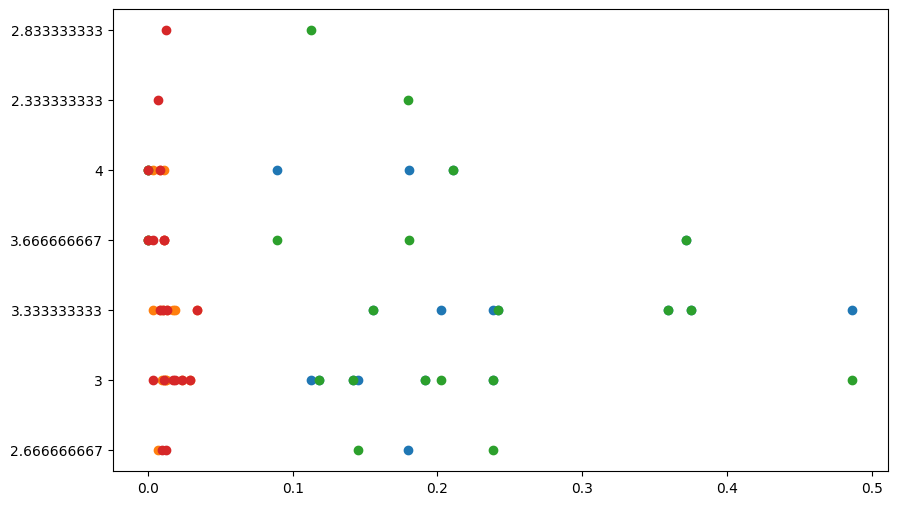

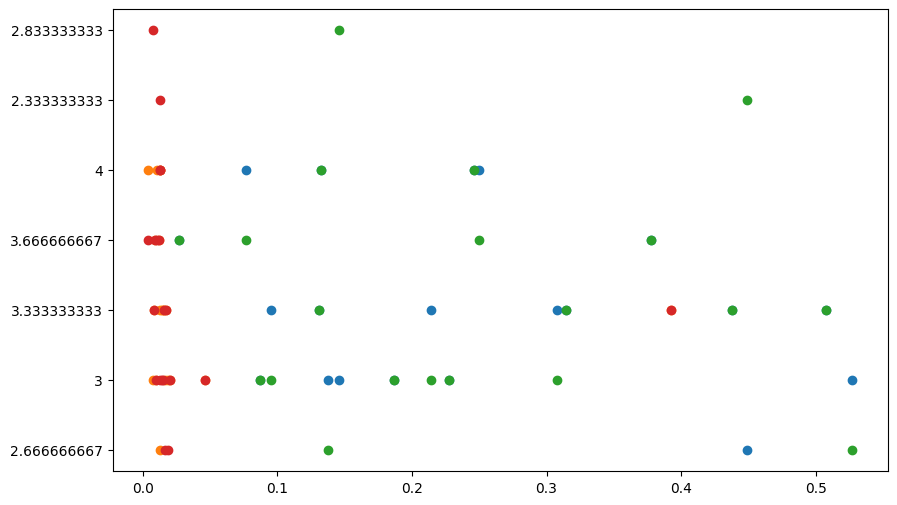

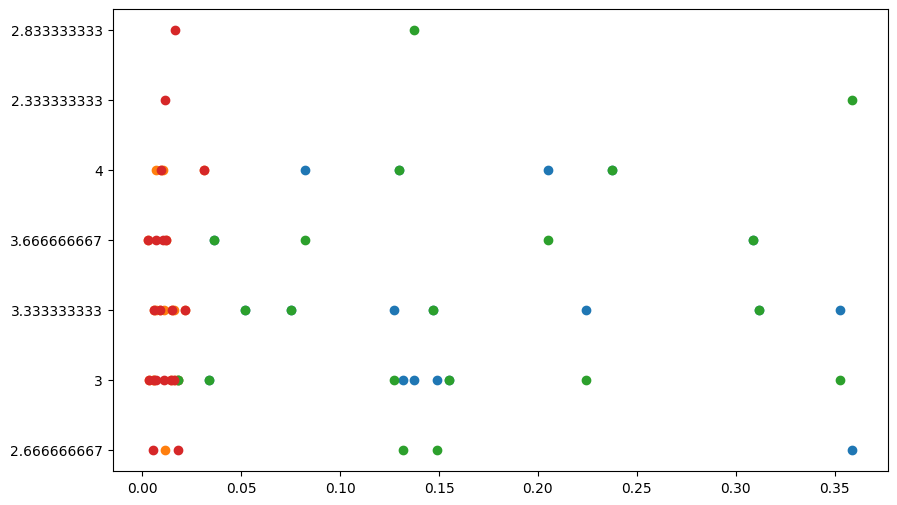

In [ ]:
import matplotlib.pyplot as plt

for model in models:
  plt.figure(figsize=(10, 6))  # Optional: set the size of the plot
  plt.scatter(dfs[f"{model}"]["precision"], dfs["new_gpt-4"].sort_values(by="acc")["acc"],)
  plt.scatter(dfs[f"{model}"]["recall"], dfs["new_gpt-4"].sort_values(by="acc")["acc"],)
  plt.scatter(dfs[f"{model}"]["precision"], dfs["new_gpt-4"].sort_values(by="comp")["comp"],)
  plt.scatter(dfs[f"{model}"]["recall"], dfs["new_gpt-4"].sort_values(by="comp")["comp"],)

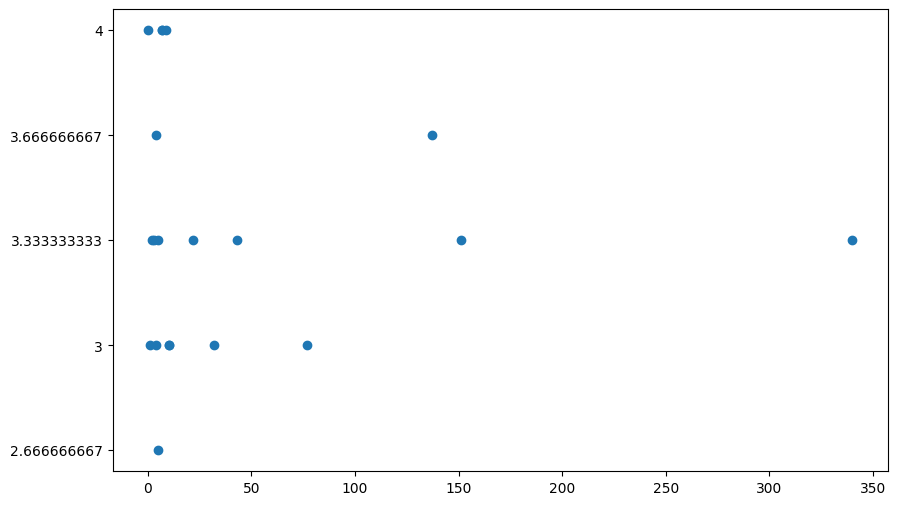

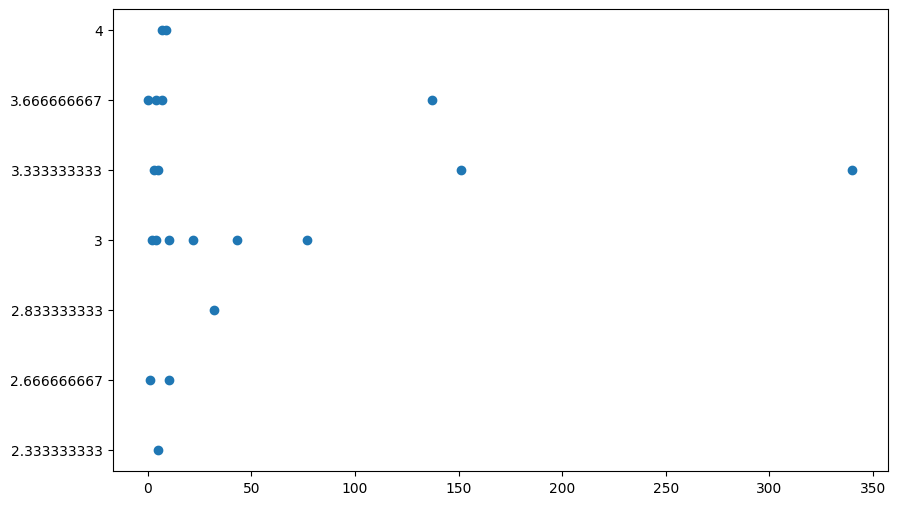

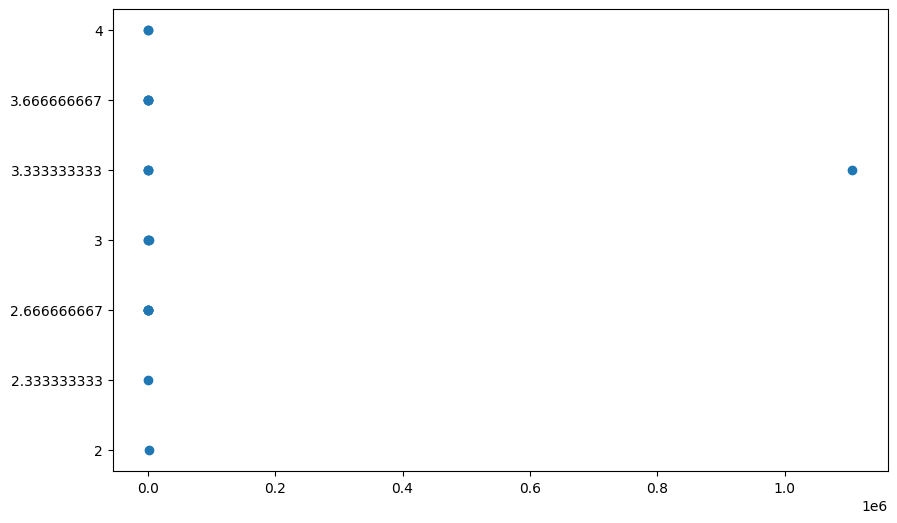

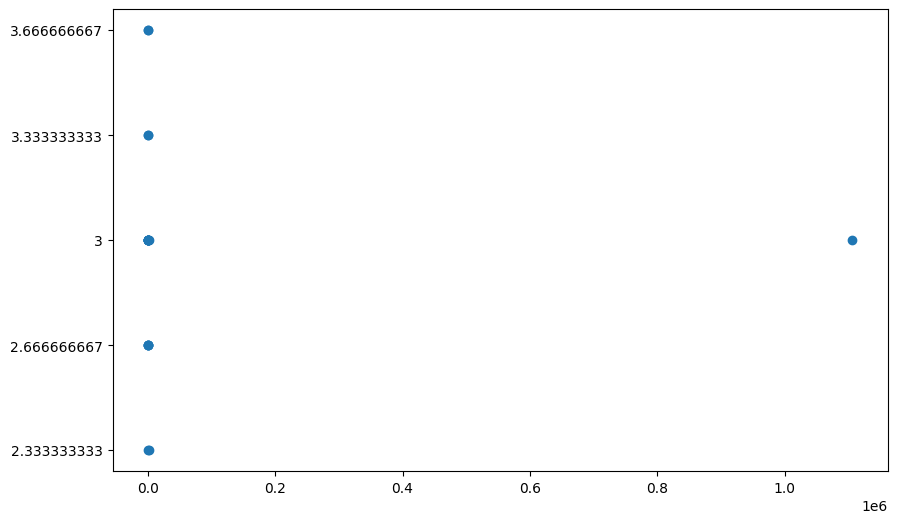

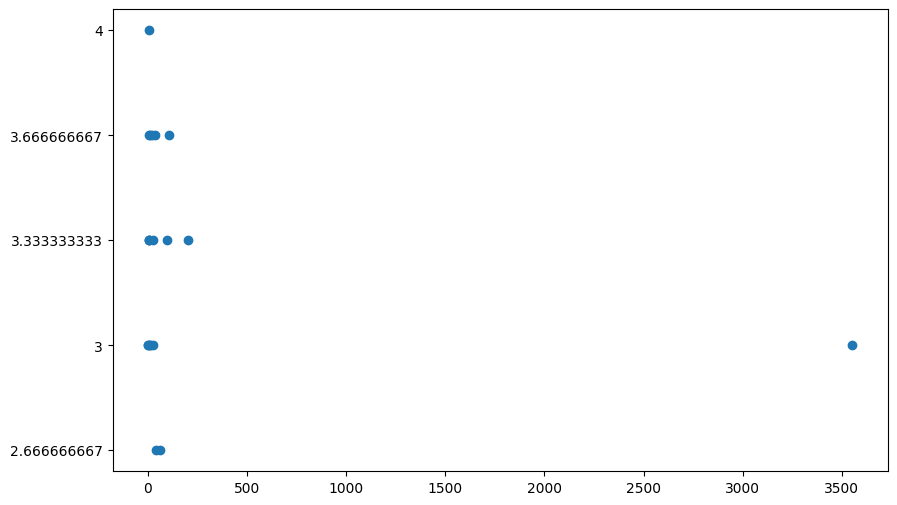

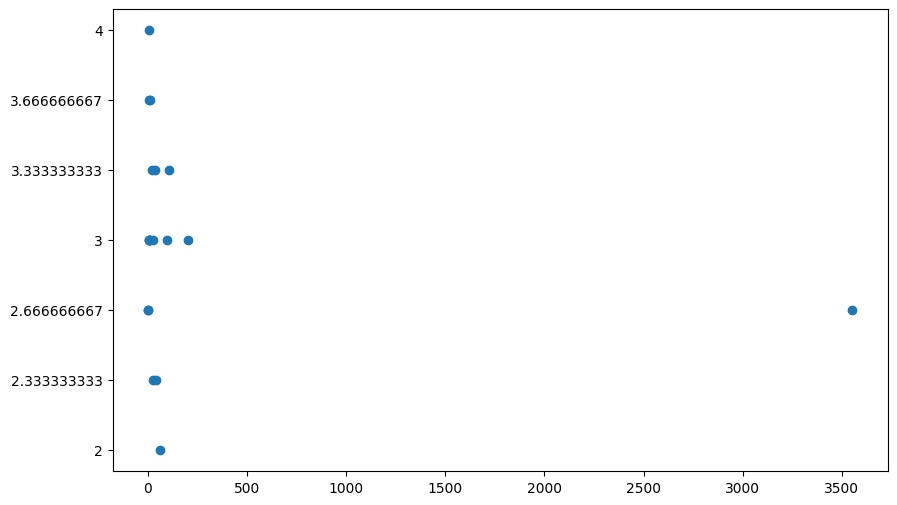

In [ ]:
import matplotlib.pyplot as plt

# Plotting the two columns
plt.figure(figsize=(10, 6))  # Optional: set the size of the plot
plt.scatter(dfs["new_gpt-4"]["simple_cycles"], dfs["new_gpt-4"].sort_values(by="acc")["acc"],)
plt.figure(figsize=(10, 6))  # Optional: set the size of the plot
plt.scatter(dfs["new_gpt-4"]["simple_cycles"], dfs["new_gpt-4"].sort_values(by="comp")["comp"],)

# Plotting the two columns
plt.figure(figsize=(10, 6))  # Optional: set the size of the plot
plt.scatter(dfs["new_PalmyraMed"]["simple_cycles"], dfs["new_PalmyraMed"].sort_values(by="acc")["acc"],)
plt.figure(figsize=(10, 6))  # Optional: set the size of the plot
plt.scatter(dfs["new_PalmyraMed"]["simple_cycles"], dfs["new_PalmyraMed"].sort_values(by="comp")["comp"],)

# Plotting the two columns
plt.figure(figsize=(10, 6))  # Optional: set the size of the plot
plt.scatter(dfs["new-llama3-70b-chat"]["simple_cycles"], dfs["new-llama3-70b-chat"].sort_values(by="acc")["acc"],)
plt.figure(figsize=(10, 6))  # Optional: set the size of the plot
plt.scatter(dfs["new-llama3-70b-chat"]["simple_cycles"], dfs["new-llama3-70b-chat"].sort_values(by="comp")["comp"],)

# Cycle Counts

In [ ]:
dfs["new-llama3-70b-chat"]["simple_cycles"]

,simple_cycles
acute flaccid myelitis,60
arthritis,40
asthma,27
creutzfeldt-jakob disease,3553
dementia,1
diabetes mellitus,1
esophageal achalasia,14
glioblastoma,13
human immunodeficiency virus,98
hyperparathyroidism,205


In [ ]:
dfs["new_PalmyraMed"]["simple_cycles"]

,simple_cycles
acute flaccid myelitis,2199
arthritis,4
asthma,11
creutzfeldt-jakob disease,75
dementia,137
diabetes mellitus,14
esophageal achalasia,13
glioblastoma,25
human immunodeficiency virus,125
hyperparathyroidism,1448


In [ ]:
dfs["new_gpt-4"]["simple_cycles"]

,simple_cycles
acute flaccid myelitis,5
arthritis,10
asthma,1
creutzfeldt-jakob disease,32
dementia,4
diabetes mellitus,77
esophageal achalasia,10
glioblastoma,43
human immunodeficiency virus,22
hyperparathyroidism,2


# Graphs for Llama3-70b


In [ ]:
directory = f"/content/drive/MyDrive/htmls/new-llama3-70b-chat/"
import os
# List all files in the directory
files = sorted([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[0]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_acute flaccid myelitis.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[1]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_arthritis.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[2]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_asthma.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[3]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_creutzfeldt-jakob disease.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[4]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_dementia.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[5]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_diabetes mellitus.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[6]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_esophageal achalasia.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[7]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_glioblastoma.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[8]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_human immunodeficiency virus.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[9]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_hyperparathyroidism.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[10]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_ischemic stroke.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[11]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_lung cancer.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[12]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_malignant neoplasms of liver.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[13]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_myocardial infarction.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[14]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_myocarditis.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[15]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_parkinson’s disease.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[16]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_renal artery stenosis.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[17]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_severe acute respiratory syndrome coronavirus 2.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[18]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_spontaneous coronary artery dissection.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[19]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new-llama3-70b-chat_ulcerative colitis.html +++


# PalmyraMed


In [ ]:
directory = f"/content/drive/MyDrive/htmls/new_PalmyraMed/"
import os
# List all files in the directory
files = sorted([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[0]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_acute flaccid myelitis.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[1]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_arthritis.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[2]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_asthma.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[3]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_creutzfeldt-jakob disease.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[4]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_dementia.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[5]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_diabetes mellitus.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[6]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_esophageal achalasia.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[7]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_glioblastoma.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[8]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_human immunodeficiency virus.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[9]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_hyperparathyroidism.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[10]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_ischemic stroke.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[11]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_lung cancer.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[12]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_malignant neoplasms of liver.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[13]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_myocardial infarction.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[14]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_myocarditis.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[15]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_parkinson’s disease.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[16]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_renal artery stenosis.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[17]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_severe acute respiratory syndrome coronavirus 2.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[18]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_spontaneous coronary artery dissection.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[19]
print(f"+++ Graph for: {f} +++")

display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_PalmyraMed_ulcerative colitis.html +++


# Graphs for GPT-4


In [ ]:
directory = f"/content/drive/MyDrive/htmls/new_gpt-4/"
import os
# List all files in the directory
files = sorted([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[0]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_acute flaccid myelitis.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[1]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_arthritis.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[2]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_asthma.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[3]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_creutzfeldt-jakob disease.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[4]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_dementia.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[5]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_diabetes mellitus.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[6]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_esophageal achalasia.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[7]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_glioblastoma.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[8]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_human immunodeficiency virus.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[9]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_hyperparathyroidism.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[10]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_ischemic stroke.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[11]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_lung cancer.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[12]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_malignant neoplasms of liver.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[13]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_myocardial infarction.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[14]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_myocarditis.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[15]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_parkinson’s disease.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[16]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_renal artery stenosis.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[17]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_severe acute respiratory syndrome coronavirus 2.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[18]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_spontaneous coronary artery dissection.html +++


In [ ]:
# you can't just display the graphs in a loop so I have to copy paste this block like forty times. No clue why.

from IPython.display import HTML, display
f = files[19]
print(f"+++ Graph for: {f} +++")
display(HTML(filename=f"{directory}{f}"))

+++ Graph for: new_gpt-4_ulcerative colitis.html +++
